# Strategy Results Plotting from RDS

In [6]:
library(repr)
library(xts)

Heat.Map<-function(x,y,z,title) {
    require(akima)
    require(plot3D)
    s = interp(x,y,z)
    image2D(s,main=title)
}

plot_strategy<-function(strategy_dir) {
    results = matrix(nrow=100, ncol=4)
    for (days_pos in 1:10) {
        for(days_neg in 1:10) {
            i = (days_pos-1)*10 + days_neg
            data = readRDS(paste(strategy_dir,'/',days_pos,'-',days_neg,'.rds',sep=""))
            size = length(data$summary[,1])
            results[i,1] = days_pos
            results[i,2] = days_neg
            results[i,3] = data$summary[size,'End.Eq'] # end equity
            results[i,4] = min(data$summary[,'Unrealized.PL']) # max drawdown
        }
    }

    options(repr.plot.width=8, repr.plot.height=4)
    par(mfrow=c(1,2), mar=c(2,2,2,2))
    Heat.Map(results[,1],results[,2],results[,3],"End Equity")
    Heat.Map(results[,1],results[,2],results[,4],"Max. Drawdown")
    return(results)
}

## Plots of 'Trend Following Strategy' Optimization

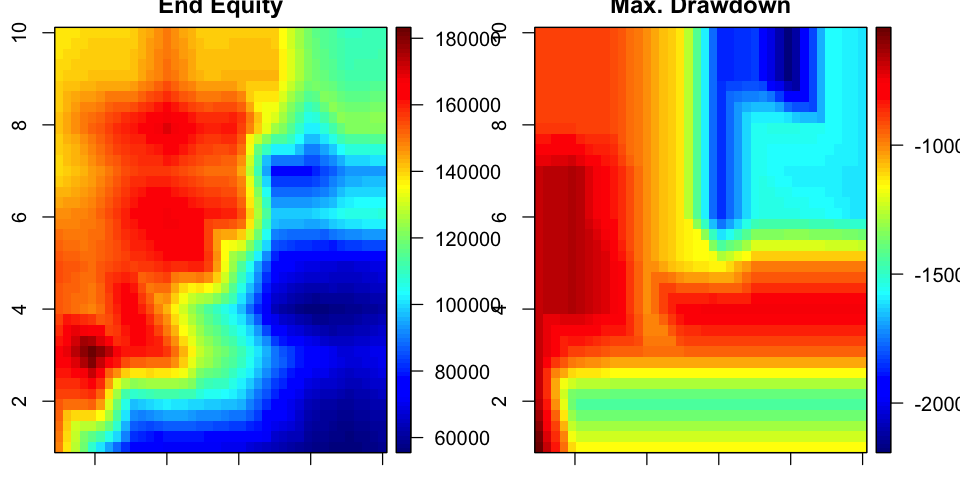

In [7]:
results_trend = plot_strategy('rds-trend')

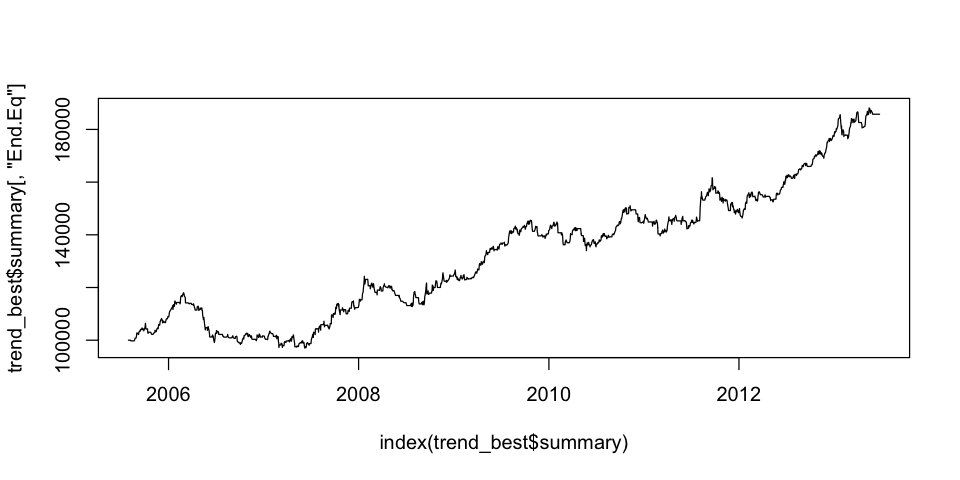

In [3]:
days_pos = 2
days_neg = 3
trend_best = readRDS(paste('rds-trend/',days_pos,'-',days_neg,'.rds',sep=""))
plot(index(trend_best$summary), trend_best$summary[,'End.Eq'], type="l")

## Plots of 'Mean Reversion Strategy' Optimization

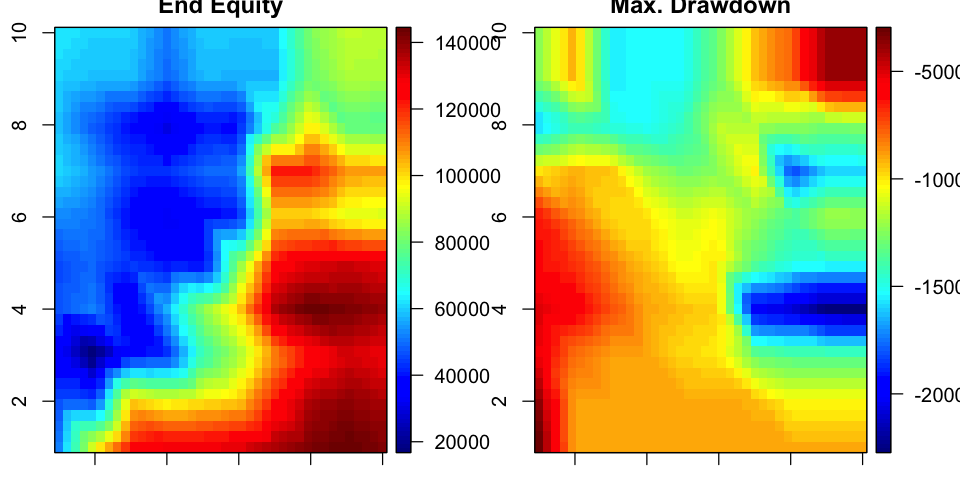

In [9]:
results_mean = plot_strategy('rds-mean')

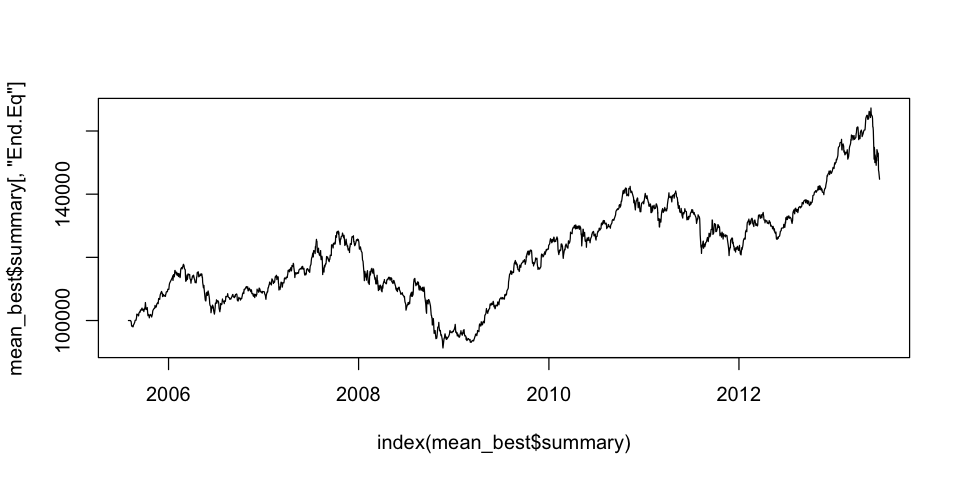

In [16]:
days_pos = 9
days_neg = 1
mean_best = readRDS(paste('rds-mean/',days_pos,'-',days_neg,'.rds',sep=""))
plot(index(mean_best$summary), mean_best$summary[,'End.Eq'], type="l")